# Introduction

Here I create a lower dimensional embedding of the genetic distance matrix that was generated from freemuxlet, for both mRNA and ATAC.

In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.sparse import csr_matrix

import gzip
import itertools as it
import umap

In [2]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(dpi=80)
sc.settings.n_jobs=16

In [3]:
# mountpoint = '/data/clue/'
# prefix_mrna = mountpoint + 'amo/mrna/'

mountpoint = '/data/clue/'
prefix_atac = mountpoint + 'amo/atac/'
prefix_mrna = mountpoint + 'amo/mrna/'

In [4]:
atac_num = 53568
mrna_num = 95135

In [ ]:
# atac_pdist = np.zeros((atac_num, atac_num), dtype=np.float16)
# mrna_pdist = np.zeros((mrna_num, mrna_num), dtype=np.float16)

The next cells take hours. I could've figured out how to split the files at the command line and parallelized in the reading in, but I figured I'd just do other stuff while I wait to read in. 

In [ ]:
# with open(prefix_atac + 'demux/aux/ldist.txt', 'r') as file:
#     for (i, j), line in tqdm(zip(it.combinations_with_replacement(range(atac_num), r=2), file), total=sum(range(atac_num + 1))):
#         val = np.float16(line.strip())
#         atac_pdist[i, j] = val
#         atac_pdist[j, i] = val

In [ ]:
# with open(prefix_mrna + 'demux/aux/ldist.txt', 'r') as file:
#     for (i, j), line in tqdm(zip(it.combinations_with_replacement(range(mrna_num), r=2), file), total=sum(range(mrna_num + 1))):
#         val = np.float16(line.strip())
#         mrna_pdist[i, j] = val
#         mrna_pdist[j, i] = val

In [6]:
# np.save(prefix_atac + 'demux/aux/atac_pdist.npy', atac_pdist)
# atac_pdist = np.load(prefix_atac + 'demux/aux/atac_pdist.npy')

# atac_pdist -= atac_pdist.min()
# np.save(prefix_atac + 'demux/aux/atac_pdist_offset.npy', atac_pdist)
atac_pdist = np.load(prefix_atac + 'demux/aux/atac_pdist_offset.npy')

In [5]:
# np.save(prefix_mrna + 'demux/aux/mrna_pdist.npy', mrna_pdist)
# mrna_pdist = np.load(prefix_mrna + 'demux/aux/mrna_pdist.npy')

# mrna_pdist -= mrna_pdist.min()
# np.save(prefix_mrna + 'demux/aux/mrna_pdist_offset.npy', mrna_pdist)
# mrna_pdist = np.load(prefix_mrna + 'demux/aux/mrna_pdist_offset.npy')

In [7]:
for i in tqdm(range(atac_num)):
    atac_pdist[i, i] = 0

  0%|          | 0/53568 [00:00<?, ?it/s]

In [8]:
# for i in tqdm(range(mrna_num)):
#     mrna_pdist[i, i] = 0

In [66]:
# U = umap.UMAP(metric='precomputed')
# atac_XY = U.fit_transform(atac_pdist)

In [5]:
# np.save(prefix_atac + 'demux/aux/atac_pdist_umap_XY.npy', atac_XY)
atac_XY = np.load(prefix_atac + 'demux/aux/atac_XY_new_offset_umap.npy')

In [6]:
atac_geno_adata = sc.AnnData(X=np.zeros((atac_num, 1), dtype=int), 
                             var=pd.DataFrame(index=['null']),
                             obs=pd.DataFrame(index=map(str, range(atac_num))))

In [7]:
atac_geno_adata.obsm['X_umap'] = atac_XY

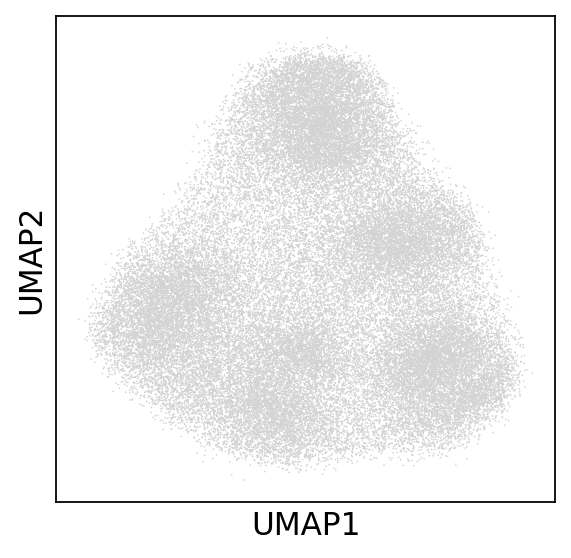

In [8]:
sc.pl.umap(atac_geno_adata)

In [9]:
freemux_atac = pd.read_csv(prefix_atac + 'demux/freemux/freemux.clust1.samples.gz', sep='\t')
freemux_atac.index = freemux_atac.index.astype('str')

In [10]:
atac_geno_adata.obs = atac_geno_adata.obs.join(freemux_atac).set_index('BARCODE')

... storing 'DROPLET.TYPE' as categorical
... storing 'BEST.GUESS' as categorical
... storing 'NEXT.GUESS' as categorical
... storing 'DBL.BEST.GUESS' as categorical


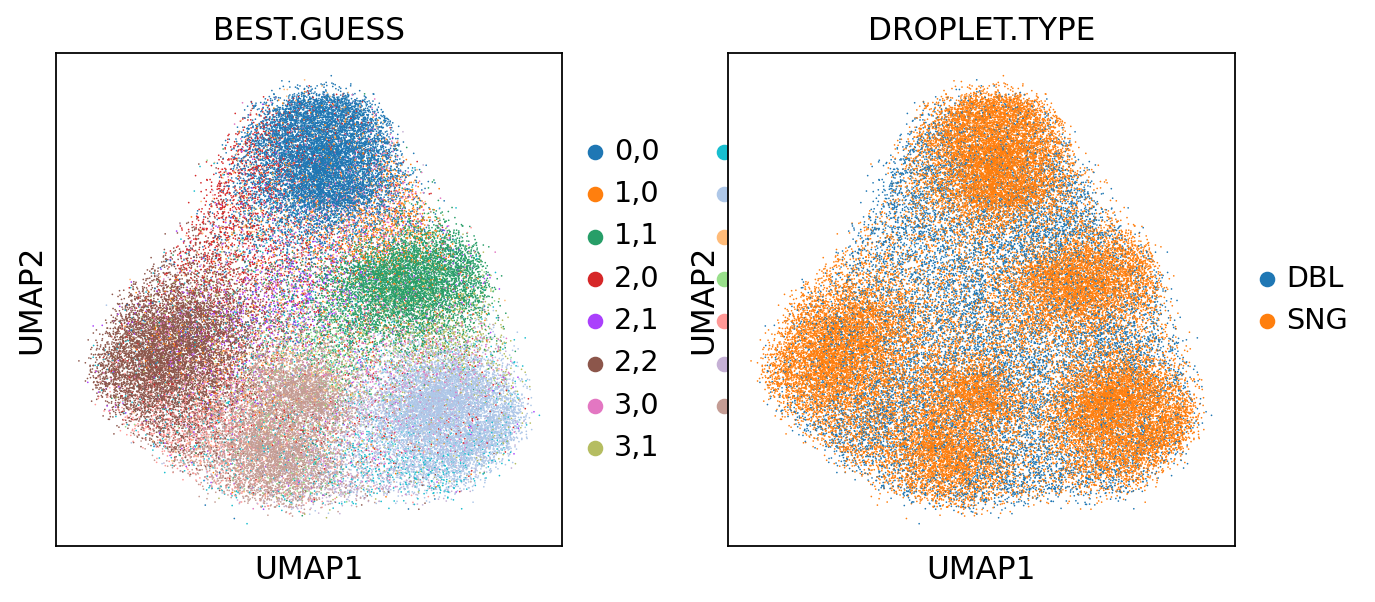

In [13]:
sc.pl.umap(atac_geno_adata, color=['BEST.GUESS', 'DROPLET.TYPE'])

In [10]:
# U = umap.UMAP(metric='precomputed')
# mrna_XY = U.fit_transform(mrna_pdist)

In [14]:
# np.save(prefix_mrna + 'demux/aux/mrna_pdist_umap_XY.npy', mrna_XY)
mrna_XY = np.load(prefix_mrna + 'demux/aux/mrna_XY_new_offset_umap.npy')

In [15]:
mrna_geno_adata = sc.AnnData(X=np.zeros((mrna_num, 1), dtype=int), 
                             var=pd.DataFrame(index=['null']),
                             obs=pd.DataFrame(index=map(str, range(mrna_num))))

In [16]:
mrna_geno_adata.obsm['X_umap'] = mrna_XY

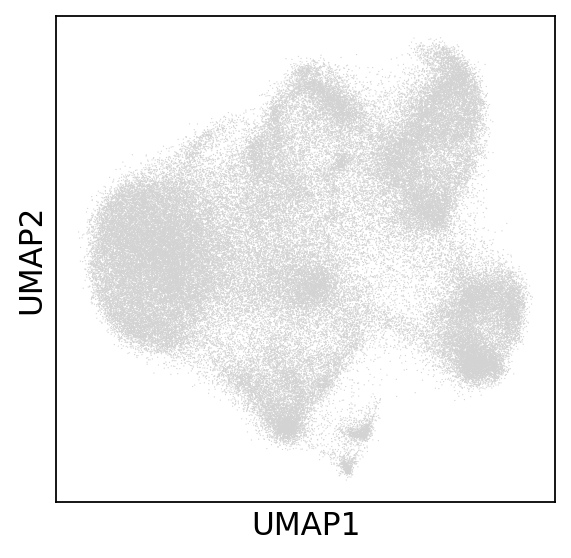

In [17]:
sc.pl.umap(mrna_geno_adata)

In [18]:
freemux_mrna = pd.read_csv(prefix_mrna + 'demux/freemux/freemux.clust1.samples.gz', sep='\t')
freemux_mrna.index = freemux_mrna.index.astype('str')

In [19]:
mrna_geno_adata.obs = mrna_geno_adata.obs.join(freemux_mrna).set_index('BARCODE')

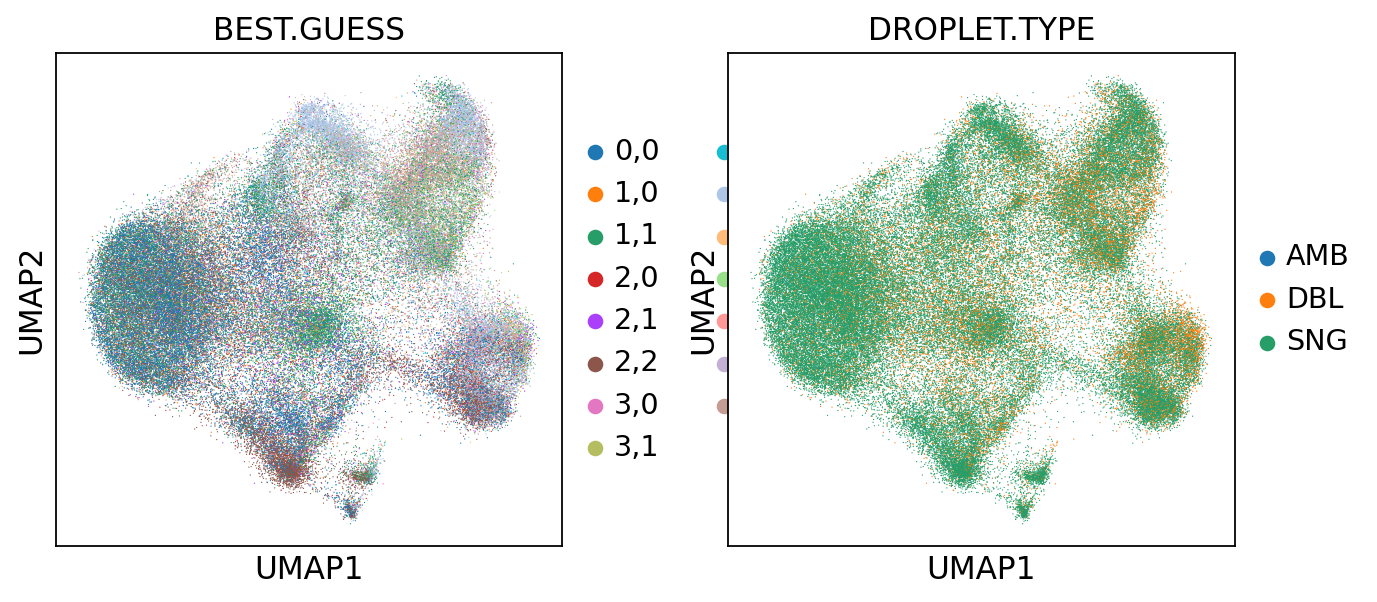

In [30]:
sc.pl.umap(mrna_geno_adata, color=['BEST.GUESS', 'DROPLET.TYPE'])

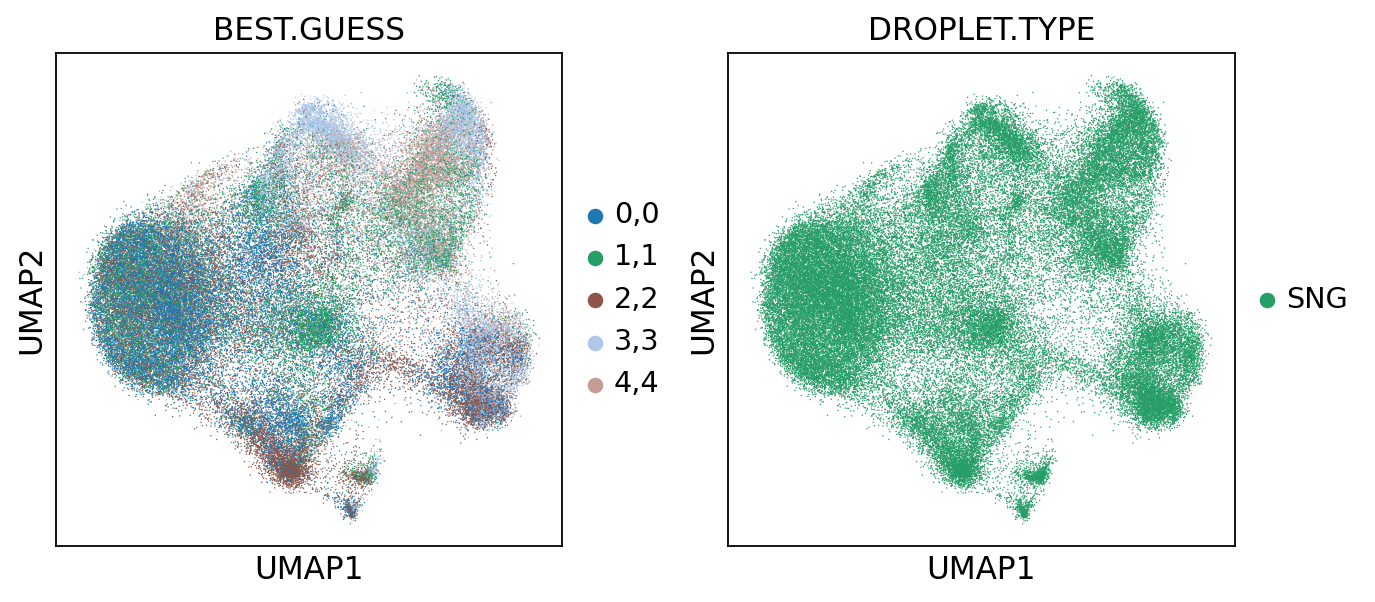

In [26]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['DROPLET.TYPE'] == 'SNG'], color=['BEST.GUESS', 'DROPLET.TYPE'])

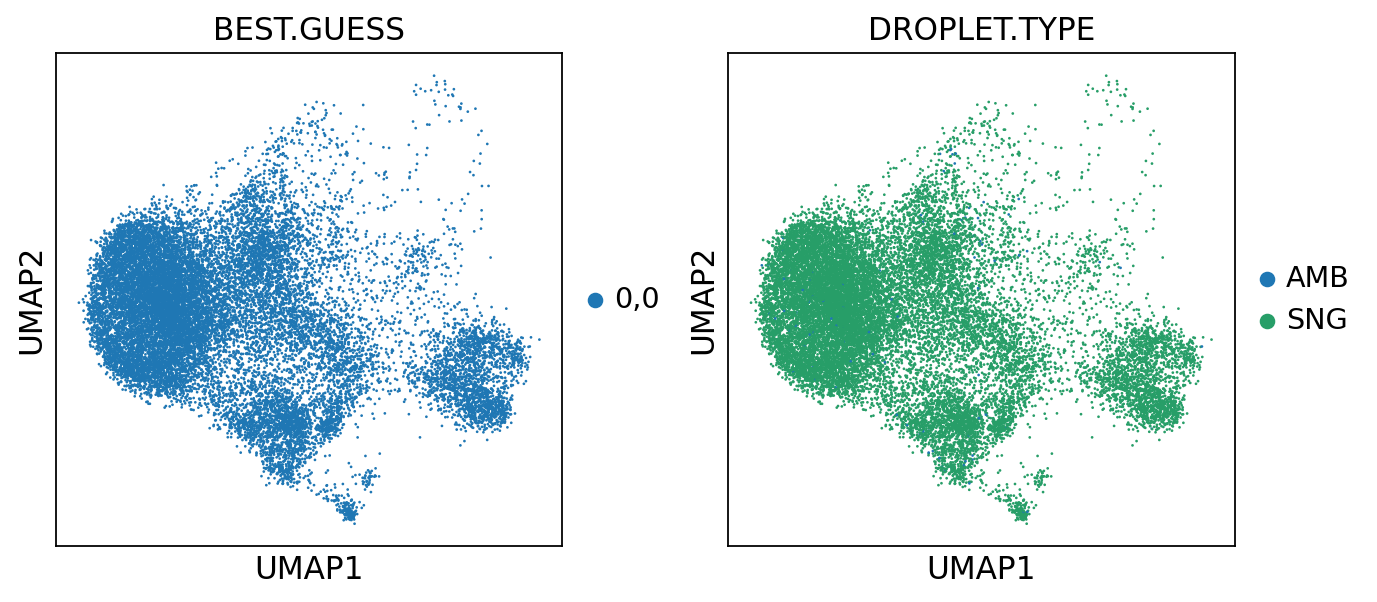

In [23]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['BEST.GUESS'] == '0,0'], color=['BEST.GUESS', 'DROPLET.TYPE'])

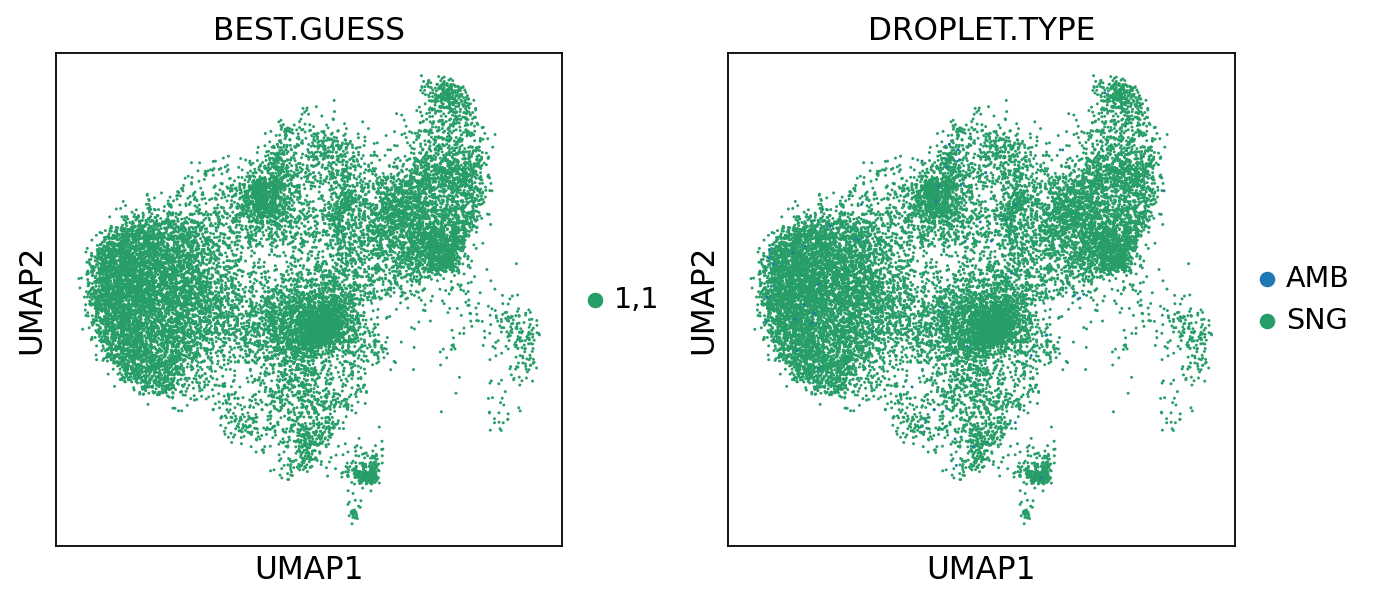

In [24]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['BEST.GUESS'] == '1,1'], color=['BEST.GUESS', 'DROPLET.TYPE'])

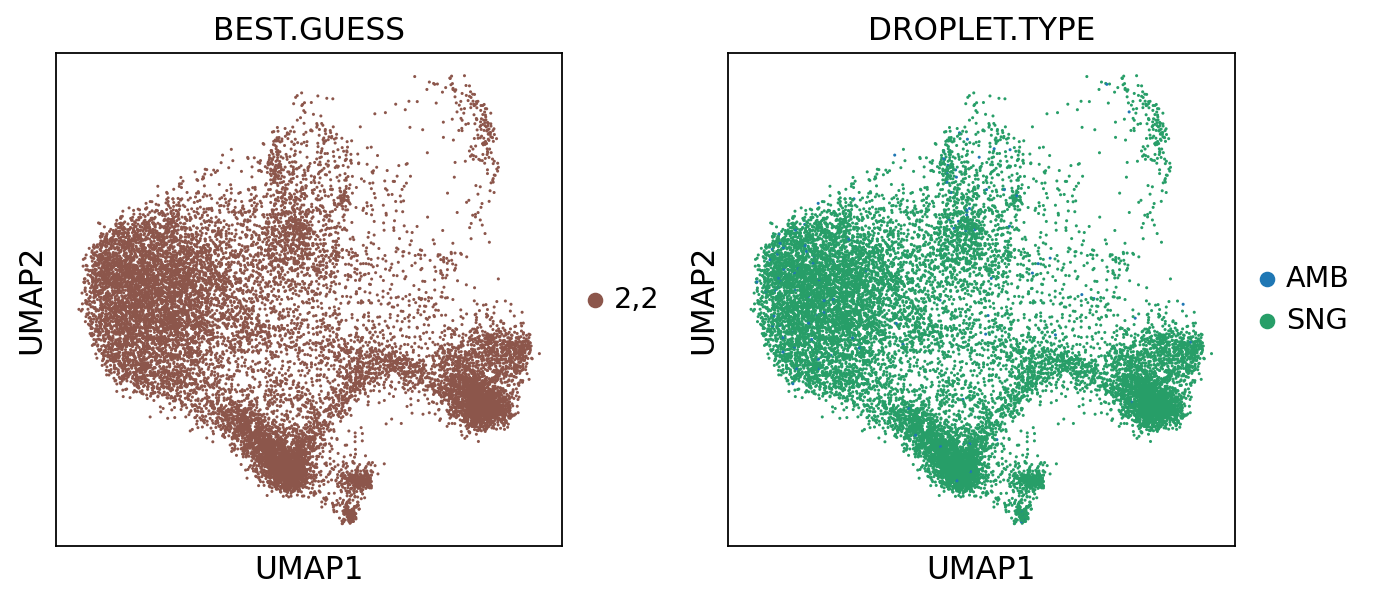

In [25]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['BEST.GUESS'] == '2,2'], color=['BEST.GUESS', 'DROPLET.TYPE'])

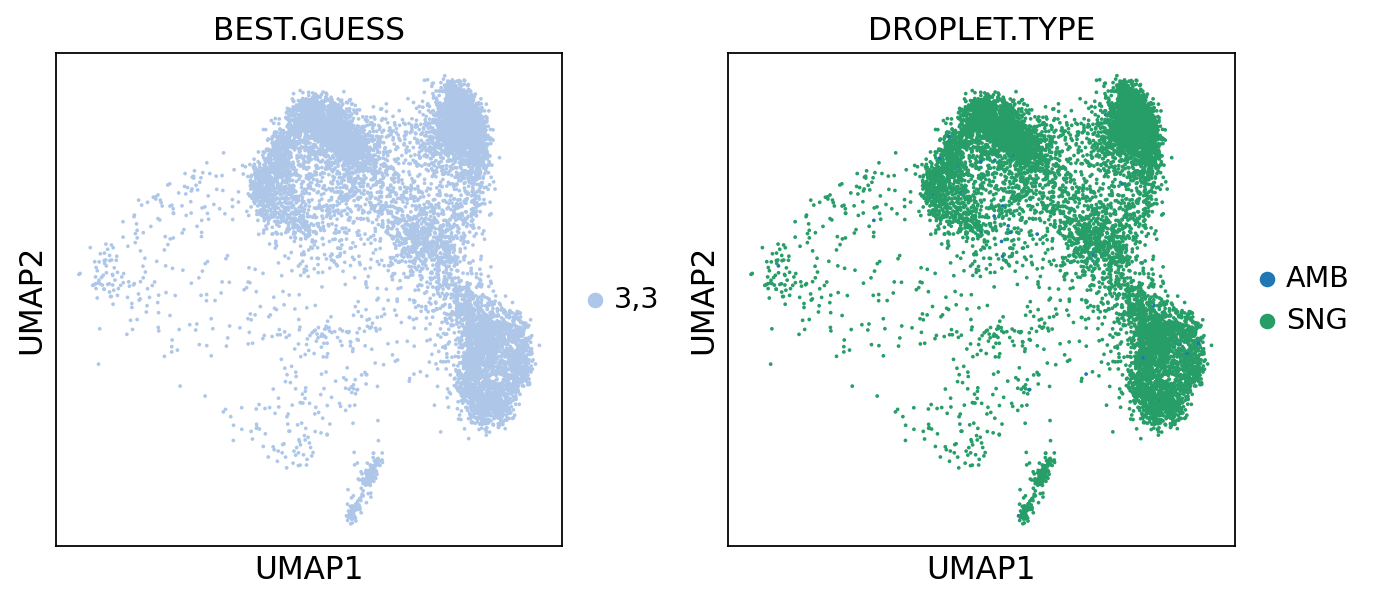

In [27]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['BEST.GUESS'] == '3,3'], color=['BEST.GUESS', 'DROPLET.TYPE'])

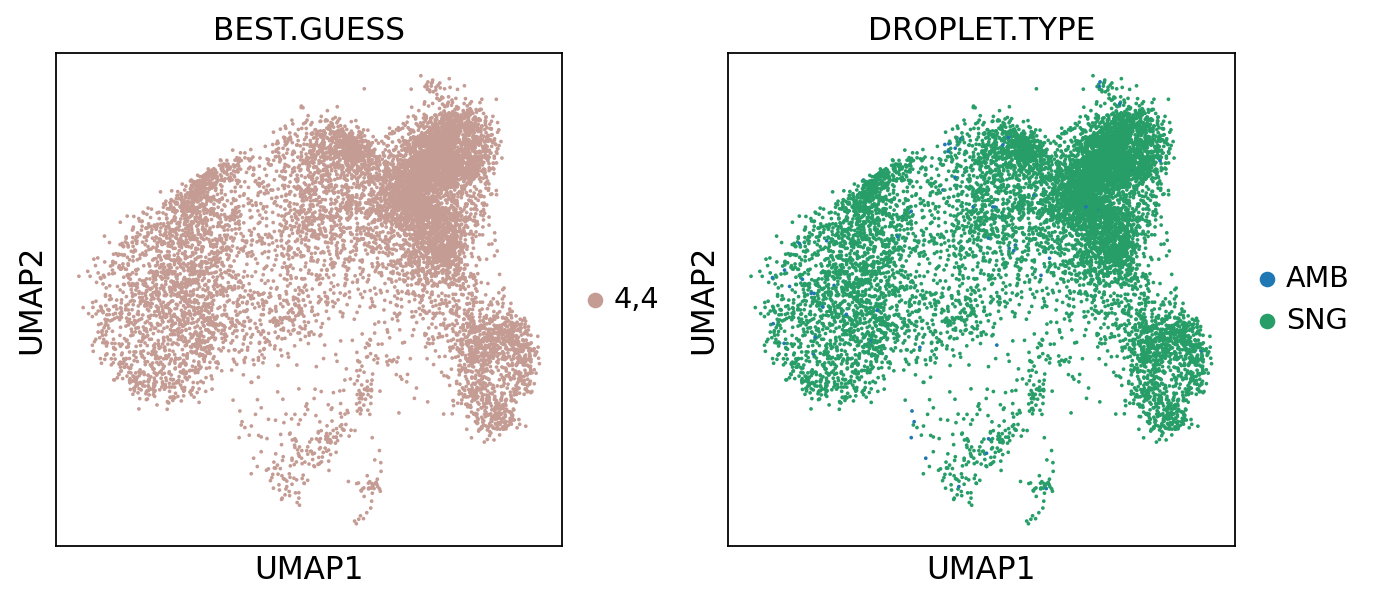

In [28]:
sc.pl.umap(mrna_geno_adata[mrna_geno_adata.obs['BEST.GUESS'] == '4,4'], color=['BEST.GUESS', 'DROPLET.TYPE'])